<a href="https://colab.research.google.com/github/sstarzh/ml_sqli_detector/blob/main/ml_sqli_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
!pip install scikit-learn>=1.0.0
!pip install ktrain

In [ ]:
import ktrain
from ktrain import text

Here, we will classify Wikipedia comments into one or more categories of so-called *toxic comments*.   Categories of toxic online behavior include toxic, severe_toxic, obscene, threat, insult, and identity_hate.  The dataset can be downloaded from the [Kaggle Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) as a CSV file (i.e., download the file ```train.csv```).  We will load the data using the ```texts_from_csv``` method, which assumes the label_columns are already one-hot-encoded in the spreadsheet. Since *val_filepath* is None, 10% of the data will automatically be used as a validation set.


In [ ]:
DATA_PATH = '/content/SQLiV3a_.csv'
NUM_WORDS = 500
MAXLEN = 100
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'payload',
                      label_columns = ["class"],
                      val_filepath=None, # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=1,
                      preprocess_mode='standard')

detected encoding: UTF-8-SIG (if wrong, set manually)
['not_class', 'class']
      not_class  class
867         0.0    1.0
1517        1.0    0.0
688         0.0    1.0
1397        1.0    0.0
731         0.0    1.0
['not_class', 'class']
      not_class  class
1800        1.0    0.0
1400        1.0    0.0
1227        1.0    0.0
1545        1.0    0.0
1241        1.0    0.0
language: en
Word Counts: 1782
Nrows: 1706
1706 train sequences
train sequence lengths:
	mean : 6
	95percentile : 18
	99percentile : 32
x_train shape: (1706,100)
y_train shape: (1706, 2)
Is Multi-Label? False
190 test sequences
test sequence lengths:
	mean : 5
	95percentile : 16
	99percentile : 29
x_test shape: (190,100)
y_test shape: (190, 2)


In [ ]:
model = text.text_classifier('bigru', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 100
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/ktrain/core.py:566: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
54/54 [==============================] - 9s 54ms/step - loss: 0.6991 - accuracy: 0.4771
Epoch 2/5
54/54 [==============================] - 3s 54ms/step - loss: 0.6685 - accuracy: 0.7040
Epoch 3/5
54/54 [==============================] - 3s 54ms/step - loss: 0.3414 - accuracy: 0.9109
Epoch 4/5
54/54 [==============================] - 3s 54ms/step - loss: 0.3154 - accuracy: 0.9555
Epoch 5/5
54/54 [==============================] - 1s 18ms/step - loss: 4.8059 - accuracy: 0.9260


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


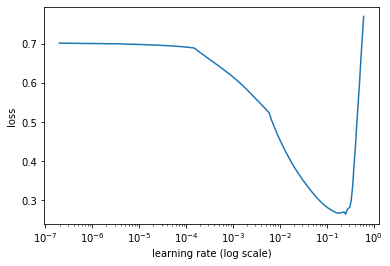

In [ ]:
learner.lr_find()
learner.lr_plot()

Three possible suggestions for LR from plot:
	Longest valley (red): 1.82E-04
	Min numerical gradient (purple): 7.11E-04
	Min loss divided by 10 (omitted from plot): 2.51E-02


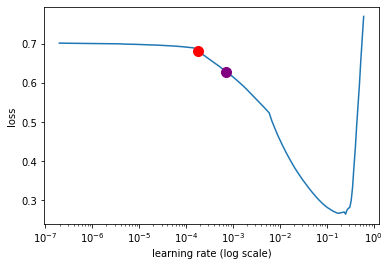

In [ ]:
learner.lr_plot(suggest=True)

In [ ]:
learner.autofit(0.8)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.8...
Epoch 1/1024
54/54 [==============================] - 8s 75ms/step - loss: 3.3014 - accuracy: 0.9004 - val_loss: 8.9397 - val_accuracy: 0.9263
Epoch 2/1024
54/54 [==============================] - 3s 59ms/step - loss: 2.4141 - accuracy: 0.9566 - val_loss: 6.8883 - val_accuracy: 0.9211
Epoch 3/1024
54/54 [==============================] - 3s 57ms/step - loss: 2.1205 - accuracy: 0.9543 - val_loss: 3.2136 - val_accuracy: 0.9474
Epoch 4/1024
54/54 [==============================] - 3s 58ms/step - loss: 1.2371 - accuracy: 0.9537 - val_loss: 4.4719 - val_accuracy: 0.9211
Epoch 5/1024
53/54 [============================>.] - ETA: 0s - loss: 1.1413 - accuracy: 0.9623
Epoch 00005: Reducing Max LR on Plateau: new max lr will be 0.4 (if not early_stopping).
54/54 [==============================] - 3s 57ms/step - loss:

In [ ]:
learner.evaluate()

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        93
           1       0.99      0.92      0.95        97

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190



array([[92,  1],
       [ 8, 89]])

In [ ]:
learner.evaluate(class_names=['benign','malicious'])

In [ ]:
learner.freeze()

In [ ]:
learner.save_model('/content')

In [ ]:
learner.predict

In [ ]:
learner.print_layers()


0 (trainable=False) : <keras.engine.input_layer.InputLayer object at 0x7f421a6eb550>
1 (trainable=False) : <keras.layers.embeddings.Embedding object at 0x7f421a6ebf50>
2 (trainable=False) : <keras.layers.core.spatial_dropout.SpatialDropout1D object at 0x7f421a6eb2d0>
3 (trainable=False) : <keras.layers.wrappers.Bidirectional object at 0x7f421a6eba10>
4 (trainable=False) : <keras.layers.pooling.GlobalAveragePooling1D object at 0x7f421a6d6f10>
5 (trainable=False) : <keras.layers.pooling.GlobalMaxPooling1D object at 0x7f421a6d6e90>
6 (trainable=False) : <keras.layers.merge.Concatenate object at 0x7f421a6d6b50>
7 (trainable=True) : <keras.layers.core.dense.Dense object at 0x7f421a6d6650>
